In [1]:
from kaiba import bootlier
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Normal and outlier series for uniform noisy distribution, 10 sigma

In [2]:
u_normal = np.random.uniform(low=0,high=1,size=100)
u_odd = np.random.uniform(low=0,high=1,size=100)
u_odd[int(len(u_odd)*0.5)]=np.mean(u_odd)+10*np.std(u_odd)  # 10 sigma outlier in the middle

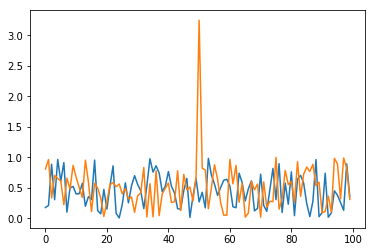

In [3]:
plt.plot(u_normal)
plt.plot(u_odd)

In [4]:
norm_hratio, normoutliers = bootlier.find_outliers(u_normal)
print("normal:", norm_hratio, normoutliers)

odd_hratio, oddoutliers = bootlier.find_outliers(u_odd)
print("odd:", odd_hratio, oddoutliers)


normal: 1.42857142857 []
odd: 1.66666666667 [3.2489961198731714]


## Normal and outlier series for sine wave distribution, 10 sigma

In [5]:
s_normal = np.sin(np.arange(0,6*np.pi,0.1*np.pi))
s_odd = np.sin(np.arange(0,6*np.pi,0.1*np.pi))
s_odd[-1]=np.mean(s_odd)+10*np.std(s_odd)  # 10 sigma outlier at the end

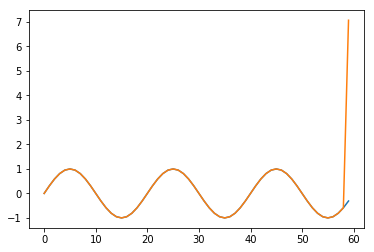

In [6]:
plt.plot(s_normal)
plt.plot(s_odd)

In [7]:
norm_hratio, normoutliers = bootlier.find_outliers(s_normal)
print("normal:", norm_hratio, normoutliers)

odd_hratio, oddoutliers = bootlier.find_outliers(s_odd)
print("odd:", odd_hratio, oddoutliers)


normal: 1.28205128205 []
odd: 2.0 [7.0710678118654755]


## 3 sigma sine wave

In [8]:
s_normal = np.sin(np.arange(0,6*np.pi,0.1*np.pi))
s_odd = np.sin(np.arange(0,6*np.pi,0.1*np.pi))
s_odd[-1]=np.mean(s_odd)+3*np.std(s_odd)  # 3 sigma outlier at the end


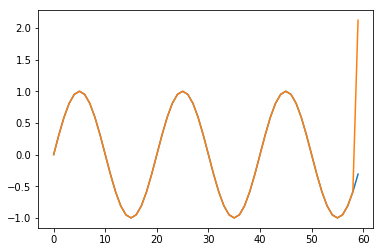

In [9]:
plt.plot(s_normal)
plt.plot(s_odd)

In [10]:
norm_hratio, normoutliers = bootlier.find_outliers(s_normal)
print("normal:", norm_hratio, normoutliers)

odd_hratio, oddoutliers = bootlier.find_outliers(s_odd)
print("odd:", odd_hratio, oddoutliers)


normal: 1.42857142857 []
odd: 1.35135135135 [2.1213203435596428]


## 5 sigma sine wave plus noise

In [11]:
s_signal = np.sin(np.arange(0,10*np.pi,0.1*np.pi))
s_noise = np.random.normal(0,0.5,len(s_signal))
s_normal = s_signal + s_noise

s_signal = np.sin(np.arange(0,10*np.pi,0.1*np.pi))
s_noise = np.random.normal(0,0.5,len(s_signal))
s_odd = s_signal + s_noise
s_odd[-1]=np.mean(s_odd)+5*np.std(s_odd)  # 5 sigma outlier at the end


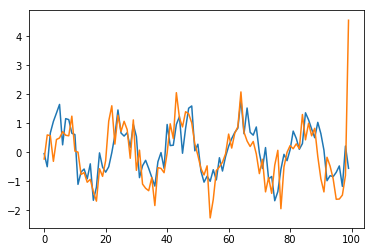

In [12]:
plt.plot(s_normal)
plt.plot(s_odd)

In [13]:
norm_hratio, normoutliers = bootlier.find_outliers(s_normal)
print("normal:", norm_hratio, normoutliers)

odd_hratio, oddoutliers = bootlier.find_outliers(s_odd)
print("odd:", odd_hratio, oddoutliers)


normal: 1.0 []
odd: 1.78571428571 [4.5502914584840903]


## Increase sensitivity to outliers, might find more outliers in the noise

In [14]:
norm_hratio, normoutliers = bootlier.find_outliers(s_normal, 1.5)
print("normal:", norm_hratio, normoutliers)

odd_hratio, oddoutliers = bootlier.find_outliers(s_odd, 1.5)
print("odd:", odd_hratio, oddoutliers)


normal: 1.51515151515 [1.8280944966858548]
odd: 2.0 [4.5502914584840903]
